> 実施予定日： 2019/07/14

- 記入者: u110

## このノートの目的

- 元のkernelを読み解き、データ解析（可視化、表現するに有効な特徴量選択）についての体験し、理解を深める
    - 元のkernel: https://www.kaggle.com/uciml/breast-cancer-wisconsin-data
        - 取り扱うデータセット： 乳がん検査のデジタル画像を元に細胞の特徴を列挙したもの。

![](https://preview.ibb.co/bKsv9k/k.jpg)
# INTRODUCTION
In this data analysis report, I usually focus on feature visualization and selection as a different from other kernels. Feature selection with correlation, univariate feature selection, recursive feature elimination, recursive feature elimination with cross validation and tree based feature selection methods are used with random forest classification. Apart from these, principle component analysis are used to observe number of components.

**Enjoy your data analysis!!!**



【訳】 序論

このデータ分析レポートでは、通常、私は他のカーネルとは違うものとして、特徴量の視覚化と選択に焦点を当てています。

- 相関による特徴量選択
- 単変量特徴量選択
- 再帰的な特徴量の除去
- クロスバリデーションによる再帰的な特徴量の削除
- 木構造を用いた特徴選択方法

これらは、ランダムフォレストによる分類処理で良く使用されます。

それとは別に

- Principle Component Analysis (PCA、主成分分析) 

を扱うことで特徴量の個数を検討することができます。

**それではデータの分析をお楽しみください！！！**

【メモ】 

> このデータ分析レポートでは、通常、私は他のカーネルとは違うものとして、

一般的なKernelはコンペのスコアを上げるためのTIPS、モデルの検証などがほとんどのため、
今回のコンペのないデータセットと区別していると思います。



# Data Analysis

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

# 【訳】 このPython3の環境（kaggle kernelのnote）便利なライブラリがインストールされています。
# 内容はこちらで定義されています。: https://github.com/kaggle/docker-python
# 例えば以下の便利なパッケージがロードできます。

import numpy as np # linear algebra 数値計算を効率的に行うための拡張モジュール
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv) データセットを操作するためのデータ構造と演算をサポートするモジュール
import seaborn as sns # data visualization library  可視化モジュール
import matplotlib.pyplot as plt # 可視化用関数
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import time
from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

data.csv



In [2]:
data = pd.read_csv('../input/data.csv')

Before making anything like feature selection,feature extraction and classification, firstly we start with basic data analysis. 
Lets look at features of data.

【訳】 特徴量選択、抽出、そして分類などを行う前にまず基本的なデータ分析から始めます。
データの特徴量を見てみましょう。

In [3]:
data.head()  # head method show only first 5 rows

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


**There are 4 things that take my attention**
1) There is an **id** that cannot be used for classificaiton 
2) **Diagnosis** is our class label
3) **Unnamed: 32** feature includes NaN so we do not need it.
4) I do not have any idea about other feature names actually I do not need because machine learning is awesome **:)**

Therefore, drop these unnecessary features. However do not forget this is not a feature selection. This is like a browse a pub, we do not choose our drink yet !!!

【訳】 **私の注意を引く点が4つある**

1）分類には使用できない ** id ** があります

2） **Diagnosis(診断結果)** はクラスラベルです

3） **Unnamed: 32** 列にはNaNが含まれているので、必要ありません。

4） その他の特徴量の名称についてはわかりません。 実際には機械学習がすばらしいので、理解する必要はありません。 **:)** 

したがって、これらの不要な特徴量を削除してください。 しかし、これは特徴量選択の作業ではないことを忘れないでください。 これはパブを眺めるようなものですが、まだドリンクを選んいるわけではないですよ!!!

【メモ】

4) について、実務においてはこのスタンスはちょっと悩ましいと思いました。

この後データの分布や変数間の相関を見て分析するフェーズにはいるはずで、
データの傾向を見つけたときに **そのデータの意味を知っているとその傾向について確信がもてるかもしれない** ので意味について知っておくのは大事と考えます。
また、データの意味と傾向に違和感などに気づくこともできます。
（データの意味が間違っていたり、整形段階で誤った処理を行っているなど）

ただし、意味に捕らわれて時間がかかってしまったり、
本来の目的を忘れて別の調査をしてしまうなどもやりがちなので、
ほどほどにして進めるのが良さそうです。

In [4]:
# feature names as a list
col = data.columns       # .columns gives columns names in data 
print(col)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [5]:
# y includes our labels and x includes our features
y = data.diagnosis   # M or B 
list = ['Unnamed: 32','id','diagnosis']   # 除外したい対象の列名
x = data.drop(list,axis = 1 )   # listという配列をもとに除外
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
# 個人的には .T関数で転置すると表示が縦になるので見やすい場合もあります。
# x.head().T

Number of Benign:  357
Number of Malignant :  212


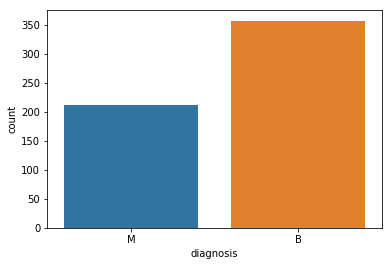

In [7]:
ax = sns.countplot(y,label="Count")       # M = 212, B = 357
B, M = y.value_counts()
print('Number of Benign: ',B)
print('Number of Malignant : ',M)

Okey, now we have features but **what does they mean** or actually **how much do we need to know about these features**
The answer is that we do not need to know meaning of these features however in order to imagine in our mind we should know something like variance, standart deviation, number of sample (count) or max min values.
These type of information helps to understand about what is going on data. For example , the question is appeared in my mind the **area_mean** feature's max value is 2500 and **smoothness_mean** features' max 0.16340. Therefore **do we need standirdization or normalization before visualization, feature selection, feature extraction or classificaiton?** The answer is yes and no not surprising ha :) Anyway lets go step by step and start with visualization.  

【訳】　オッケー、この特徴量ですが、**それらの意味について** や **これらの特徴量についてどれだけ知る必要があるのでしょうか？**
答えは、これらの意味を知る必要はありません。 
しかし、データのイメージを掴むため分散、標準偏差、サンプル数（カウント）、または最大最小値については知っておいたほうが良いでしょう。 
これら代表値の情報は、データの状況を理解するのに役立ちます。 
たとえば、**area_mean** の最大値は2500、**smoothness_mean**機能の最大値は0.16340です。 
その場合、**可視化、特徴量選択、特徴量抽出または分類の前に、標準化または正規化が必要でしょうか？** 
答えは「イエス」であり、驚くべきことではありません。 :）
とにかく一歩ずつ進めて、次に可視化の作業を始めましょう。

【メモ】
ここでもここの特徴量について知る必要は無いという意見でしたが、特徴量を選ぶタイミングでは意味を知っておいたほうが良いと思っています。
もしかしたら、今回のノートでは手法の紹介と割り切っているためかもしれません。参加者のみなさんと議論したいところ。

In [8]:
x.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [9]:
# これも転置させると全部見れる。
# x.describe().T

# Visualization
In order to visualizate data we are going to use seaborn plots that is not used in other kernels to inform you and for diversity of plots. What I use in real life is mostly violin plot and swarm plot. Do not forget we are not selecting feature, we are trying to know data like looking at the drink list at the pub door.

【訳】 可視化

データを視覚化するために、他のカーネルでは使用されていないseabornプロットを使用して、多数の描画方法について紹介します。 私がよく使っているのは、主にバイオリン図とスワームプロット（蜂群図）です。 我々は特徴量選択をしているわけでないことに注意してください、我々はパブのドアで飲み物のリストを眺めているように、データを知ろうとしているところです。

Before violin and swarm plot we need to normalization or standirdization. Because differences between values of features are very high to observe on plot. I plot features in 3 group and each group includes 10 features to observe better.

【訳】バイオリン、スワームプロットを作成する前に、正規化(normalization)や標準化(standardization)が必要です。 特徴量の値の間の差はグラフで観察するのが非常に大きすぎるためです。
私は3つのグループに特徴量をプロットし、各グループには10つの特徴量が含まれています。

【メモ】 正規化、標準化について

単位や次元が違うことで、数量をそのまま比較することができないものを代表値などで割るなどして比較できるようにすること。

以下では

$$
z = \frac{X - \mu}{\sigma}
$$

という式で平均0標準偏差1の分布に変換しています。

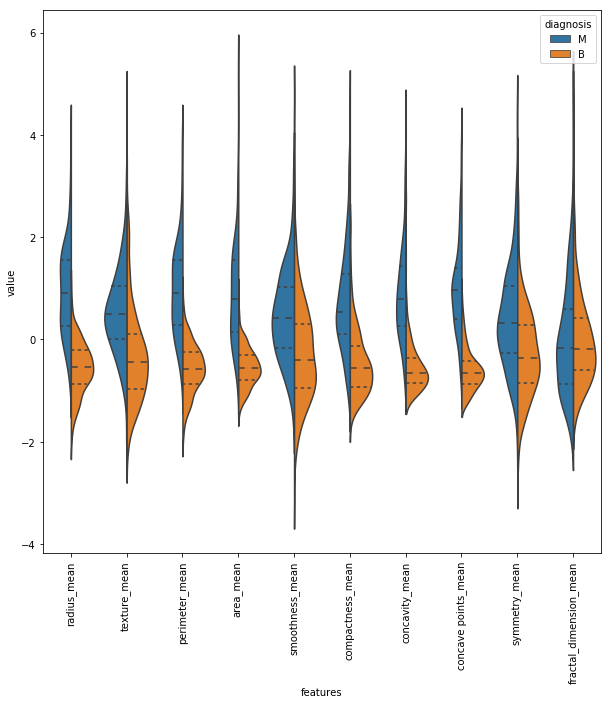

In [10]:
# first ten features
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90);

Lets interpret the plot above together. For example, in **texture_mean** feature, median of the *Malignant* and *Benign* looks like separated so it can be good for classification. However, in **fractal_dimension_mean** feature,  median of the *Malignant* and *Benign* does not looks like separated so it does not gives good information for classification.

【訳】　上記のプロットを一緒に解釈しましょう。 たとえば、**texture_mean** では、 *悪性腫瘍(Malignant)* 　と　*良性腫瘍(Benign)*　の中央値が分離しているように見えるため、分類に適していると言えそうです。 しかし、 *fractal_dimension_mean* は、悪性および良性の中央値は分離されていないように見えるので、分類のための良い情報は得られていません。

【メモ】 上のコードは今までの中では長めのコードになるので、順を追って見てみます。

In [11]:
data_dia = y  #  y = data.diagnosis
data = x
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)


# 列が横長になっているものを列名を持つ列を追加した上で縦長に整形(ここでは前半3行のデータのみ使って整形しています)
data = pd.melt(data.head(3),id_vars="diagnosis",
                    var_name="features",
                    value_name='value')

# データを縦長にもたせseabornのプロットに適した形に整形している。
data

,diagnosis,features,value
0,M,radius_mean,1.096100
1,M,radius_mean,1.828212
2,M,radius_mean,1.578499
3,M,texture_mean,-2.071512
4,M,texture_mean,-0.353322
5,M,texture_mean,0.455786
6,M,perimeter_mean,1.268817
7,M,perimeter_mean,1.684473
8,M,perimeter_mean,1.565126
9,M,area_mean,0.983510


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

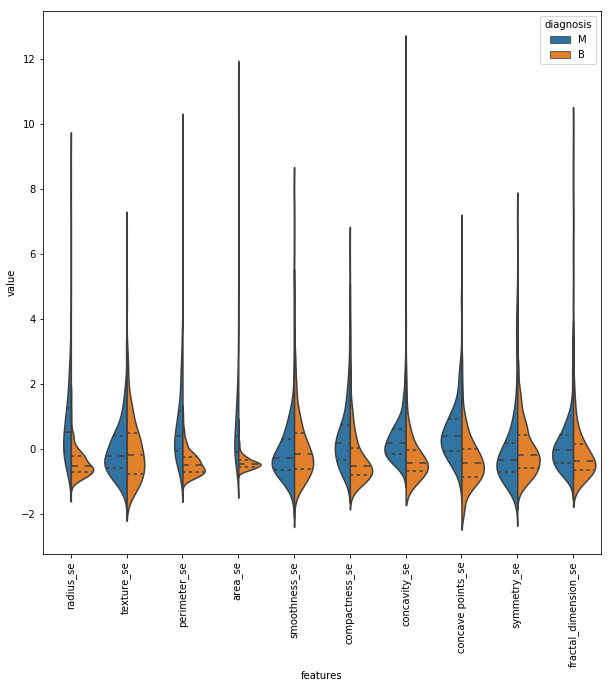

In [12]:
# Second ten features
data = pd.concat([y,data_n_2.iloc[:,10:20]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

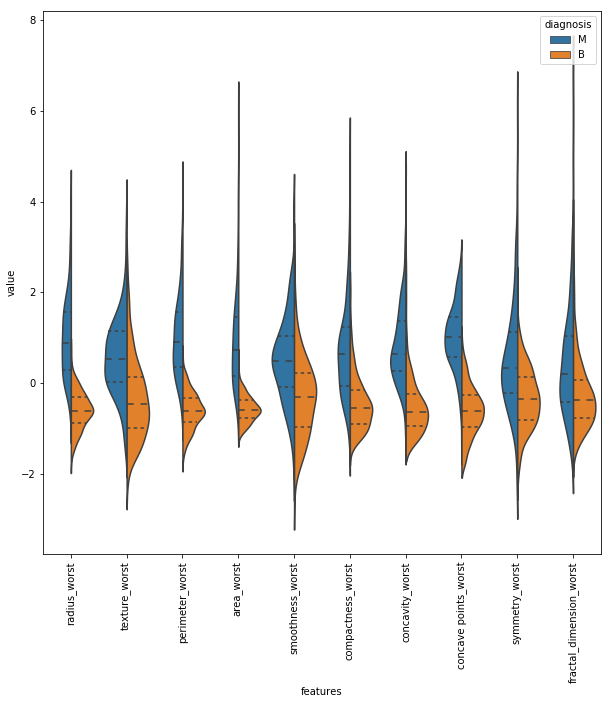

In [13]:
# Second ten features
data = pd.concat([y,data_n_2.iloc[:,20:31]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="diagnosis", data=data,split=True, inner="quart")
plt.xticks(rotation=90)

Lets interpret one more thing about plot above, variable of **concavity_worst** and **concave point_worst** looks like similar but how can we decide whether they are correlated with each other or not.
(Not always true but, basically if the features are correlated with each other we can drop one of them)

【訳】 上のプロットについてもう一つ解釈すると、 **concavity_worst** と **convex_worst** は同様のように見えますが、どうやって相関しているかどうかを判断できえうしょうか。 （絶対ではないが、基本的に特徴量が相関が強い場合、その特徴量の1つを削除できます）

【メモ】

機械学習、統計モデルでは、各説明変数は独立変数であるという仮定を置くので、
説明変数間で強い相関がある＝独立ではない　となるとそもそもの仮定が間違ってしまいます。
強い相関のある特徴量を含んだままモデルの構築（パラメタ推定）を行うと、安定しなかったり、性能が悪くなってしまうので注意が必要です。
詳しくは　「マルチコ」、「多重共線性」というワードで調べてみてください。

In order to compare two features deeper, lets use joint plot. Look at this in joint plot below, it is really correlated.
 Pearsonr value is correlation value and 1 is the highest. Therefore, 0.86 is looks enough to say that they are correlated. 
Do not forget, we are not choosing features yet, we are just looking to have an idea about them.

【訳】 この2つの特徴量をより深く比較するために、ジョイントプロットを使用できます。 下のジョイントプロットを見てみるとやはり強い相関を示しています。 ピアソン相関係数は、1が最も高い。 したがって、0.86は十分相関があると言えます。 私たちはまだ特徴量選択をしていないことを忘れないでください。私たちは特徴量選択のためのアイデアを探している段階です。

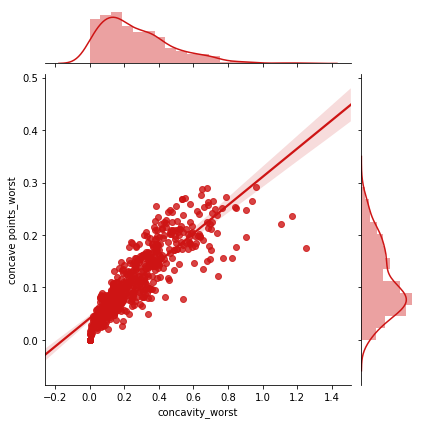

In [14]:
import warnings
warnings.filterwarnings('ignore')  # 最新でパッチがあたるので今は無視 https://github.com/mwaskom/seaborn/issues/1392

sns.jointplot(x=x.loc[:,'concavity_worst'], y=x.loc[:,'concave points_worst'], kind="reg", color="#ce1414");

What about three or more feauture comparision ? For this purpose we can use pair grid plot. Also it seems very cool :)
And we discover one more thing **radius_worst**, **perimeter_worst** and **area_worst** are correlated as it can be seen pair grid plot. We definetely use these discoveries for feature selection.

【訳】 3つ以上の特徴量の比較はにはペアグリッドプロットを使用することができます。 それは非常にクールだ:)

私たちは新たに **radius_worst**、 **perimeter_worst** と **area_worst** について相関があることを発見し、
ペアグリッドプロットとでも確認できます。 
我々はこれらの発見を特徴選択のために使用します。

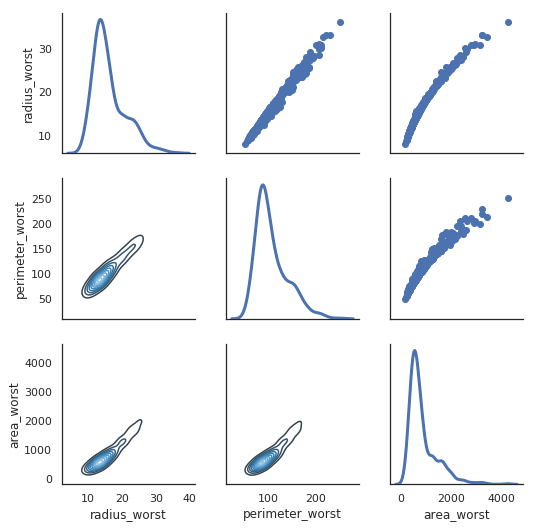

In [15]:
sns.set(style="white")
df = x.loc[:,['radius_worst','perimeter_worst','area_worst']]
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")  # 下部を2変量のカーネル密度推定値の描画
g.map_upper(plt.scatter)  # 上部を散布図行列の描画
g.map_diag(sns.kdeplot, lw=3)  # 対角要素を　1変量のカーネル密度推定値の描画

Up to this point, we make some comments and discoveries on data already. If you like what we did, I am sure swarm plot will open the pub's door :) 

In swarm plot, I will do three part like violin plot not to make plot very complex appearance

【訳】　ここまで、データに関するコメントや発見を行ってきました。 私たちがしたことが好きなら、私はスウォームプロットがパブのドアを開けると確信しています:)

スウォームプロット（蜂群図）でも、繁雑な描画にならないように、バイオリンプロット同様に3つに分けて行います。

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

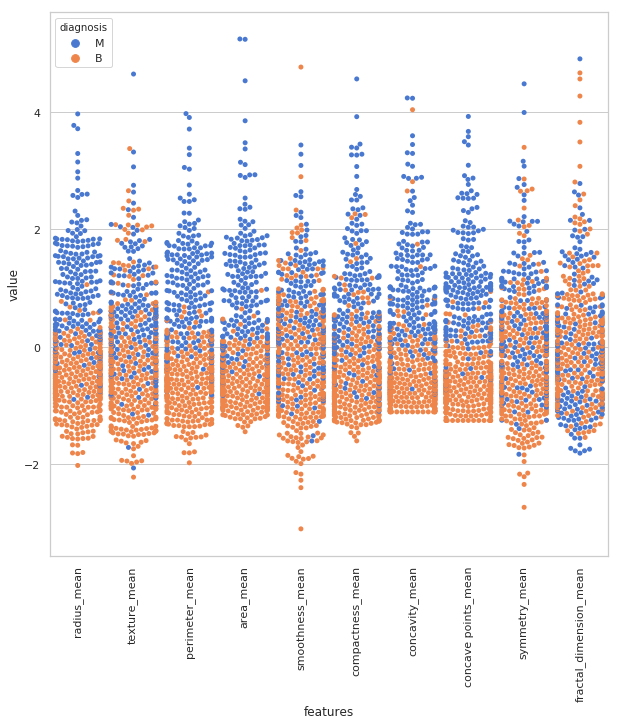

In [16]:
sns.set(style="whitegrid", palette="muted")
data_dia = y
data = x
data_n_2 = (data - data.mean()) / (data.std())              # standardization
data = pd.concat([y,data_n_2.iloc[:,0:10]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
tic = time.time()
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)

plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

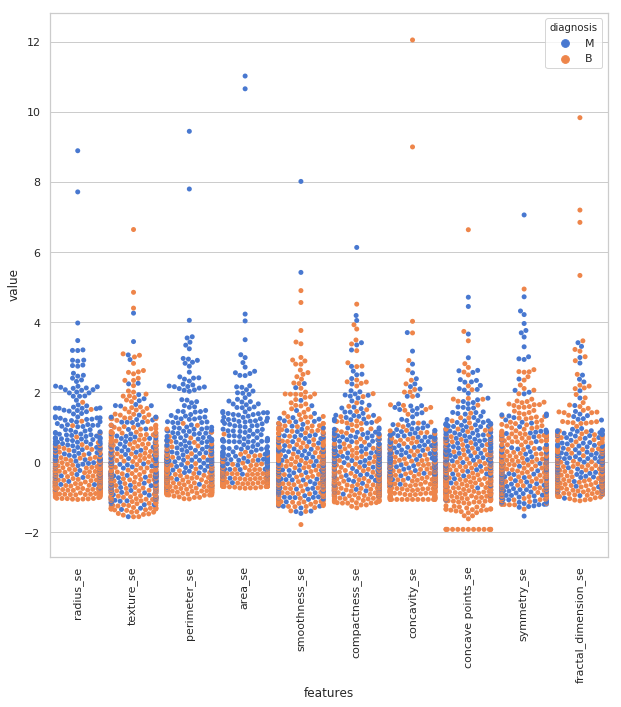

In [17]:
data = pd.concat([y,data_n_2.iloc[:,10:20]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)
plt.xticks(rotation=90)

swarm plot time:  11.989902257919312  s
swarm plot time:  11.989902257919312  s


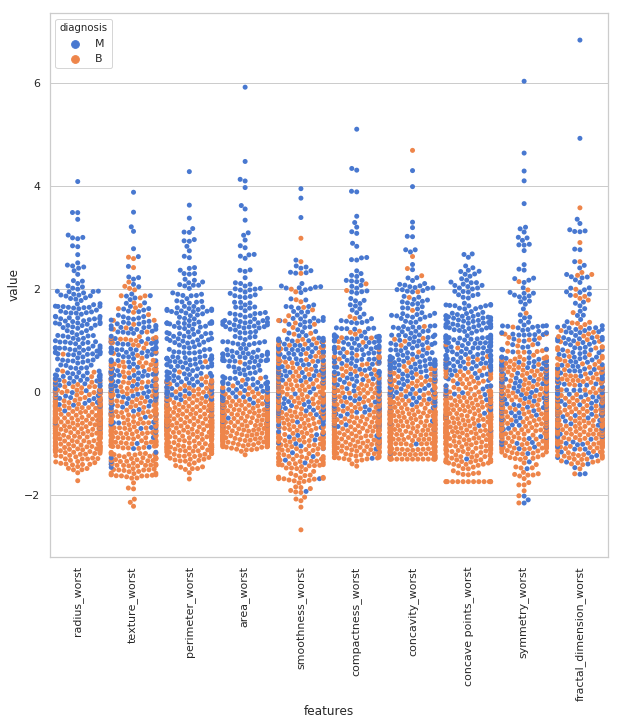

In [18]:
data = pd.concat([y,data_n_2.iloc[:,20:31]],axis=1)
data = pd.melt(data,id_vars="diagnosis",
                    var_name="features",
                    value_name='value')
plt.figure(figsize=(10,10))
sns.swarmplot(x="features", y="value", hue="diagnosis", data=data)
toc = time.time()
plt.xticks(rotation=90)
print("swarm plot time: ", toc-tic ," s")
# 処理時間を表示
print("swarm plot time: ", toc-tic ," s")

They looks cool right. And you can see variance more clear. Let me ask you a question, **in these three plots which feature looks like more clear in terms of classification.** In my opinion **area_worst** in last swarm plot looks like malignant and benign are seprated not totaly but mostly. Hovewer, **smoothness_se** in swarm plot 2 looks like malignant and benign are mixed so it is hard to classfy while using this feature.

【訳】 クールだね。 そして、あなたは分散をより明確に見えているでしょう。 質問をしてみましょう。 **これらの3つのプロットの中で、分類を行う上で有効な特徴量はどれでしょう?** 私の意見では最後の描画にある **area_worst** はほぼうまく分離しているように見えます。 一方二番目の描画に含まれている **smoothness_se**　については良性、悪性が混じっているため、この特徴量を利用してもクラス分けは難しいでしょう。

**What if we want to observe all correlation between features?** Yes, you are right. The answer is heatmap that is old but powerful plot method.

【訳】　すべての特徴量について相関を見たい場合、どうすればよいでしょう？ はい、正解です。答えはヒートマップを使います。これは昔からある強力な描画方法です。

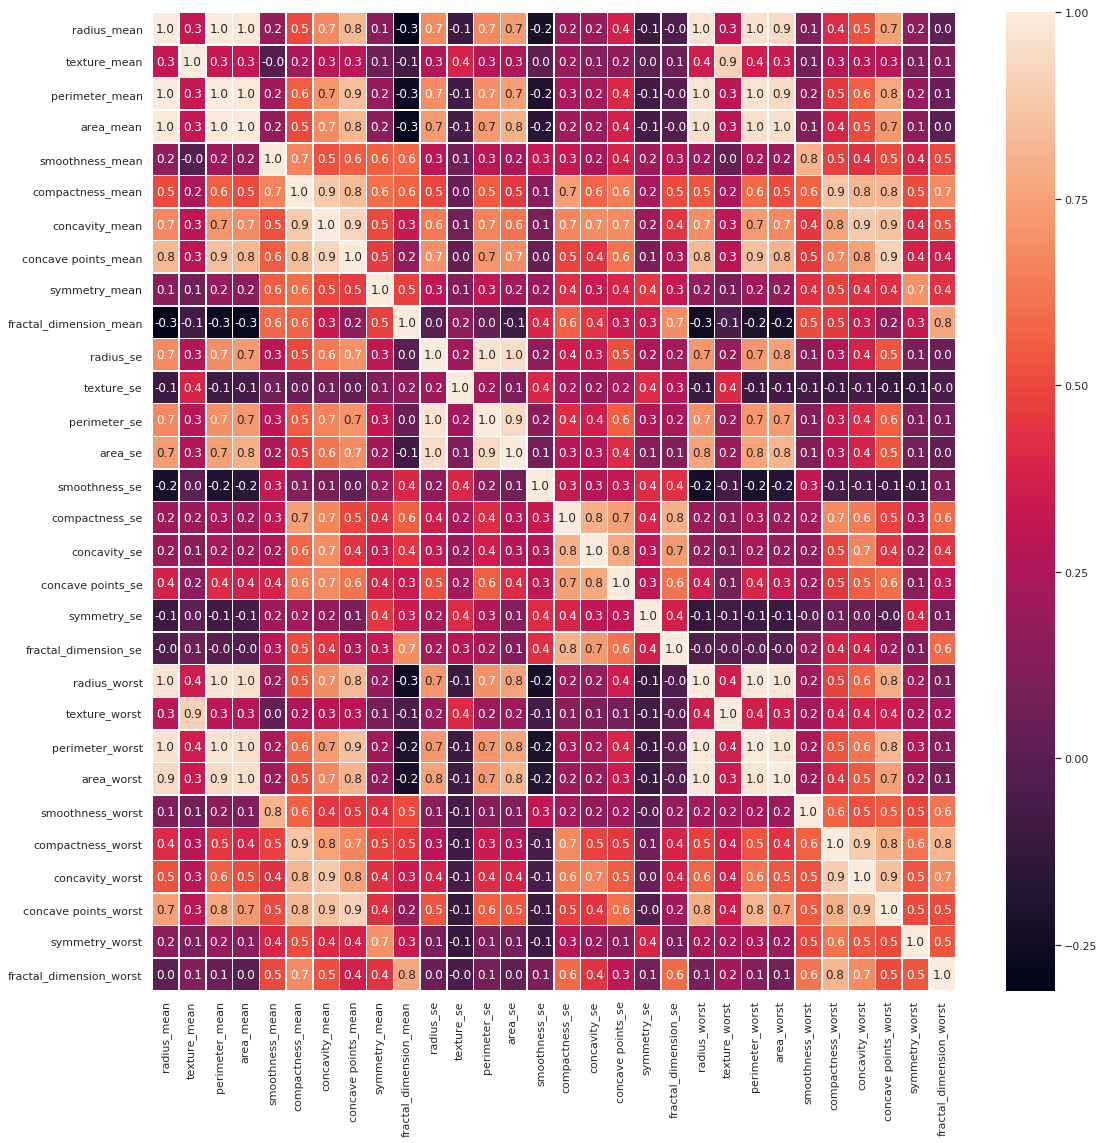

In [19]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(x.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

Well, finaly we are in the pub and lets choose our drinks at feature selection part while using heatmap(correlation matrix).

【訳】 ここでやっと私たちはパブに入ったので、相関行列のヒートマップを使い、後半の特徴量選択パートで飲み物を選びましょう。

# Feature Selection and Random Forest Classification
Today our purpuse is to try new cocktails. For example, we are finaly in the pub and we want to drink different tastes. Therefore, we need to compare ingredients of drinks. If one of them includes lemon, after drinking it we need to eliminate other drinks which includes lemon so as to experience very different tastes.

【訳】目的は新しいカクテルを作ることだ。  
例えば、我々はとうとうパブに入って、いろいろな味を飲み比べている。  
したがって、飲み物の成分を比べる必要がある。  
もしレモンが入っているものを飲んだ後は、もっと違う味を知るためにレモンの入っていない飲み物を飲みましょう。

In this part we will select feature with different methods that are feature selection with correlation, univariate feature selection, recursive feature elimination (RFE), recursive feature elimination with cross validation (RFECV) and tree based feature selection. We will use random forest classification in order to train our model and predict. 

【訳】ここでは以下の異なる特徴量選択手法を見てみる。
* 単変量特徴量選択
* 再帰的特徴量除去 (RFE)
* クロスバリデーションと共にRFE (CVRFE)
* 木構造特徴量選択  
モデルの訓練と推測にはランダムフォレストを使う。

## 1) Feature selection with correlation and random forest classification

As it can be seen in map heat figure **radius_mean, perimeter_mean and area_mean** are correlated with each other so we will use only **area_mean**. If you ask how i choose **area_mean** as a feature to use, well actually there is no correct answer, I just look at swarm plots and **area_mean** looks like clear for me but we cannot make exact separation among other correlated features without trying. So lets find other correlated features and look accuracy with random forest classifier. 

【訳】ヒートマップで見たように、**radius_mean**,**perimeter_mean**,**area_mean**はそれぞれ相関していたため、**area_mean**のみを使うとしよう。  
なぜ**area_mean**を使うのかって？特に理由はないが、強いて言えば**area_mean**の swarm plot がよく分離しているように見えたからだ。  
だが、他の相関のある特徴量はまだ除去していない。  
では他の相関のある特徴量を探したのち、ランダムフォレストの精度を見てみよう。

【コメント】Random Forest とは、複数の決定木を弱学習器としてそれぞれ異なるデータで学習させ、各弱学習器の予測結果の平均を出力するモデルのこと。  
決定木の過学習をしやすいというデメリットを解決するための手段で、特に分類器として安定して高い精度が期待できる。

**Compactness_mean, concavity_mean and concave points_mean** are correlated with each other.Therefore I only choose **concavity_mean**. Apart from these, **radius_se, perimeter_se and area_se** are correlated and I only use **area_se**.  **radius_worst, perimeter_worst and area_worst** are correlated so I use **area_worst**.  **Compactness_worst, concavity_worst and concave points_worst** so I use **concavity_worst**.  **Compactness_se, concavity_se and concave points_se** so I use **concavity_se**. **texture_mean and texture_worst are correlated** and I use **texture_mean**. **area_worst and area_mean** are correlated, I use **area_mean**.




【訳】相関のある特徴量と選択した特徴量の一覧  
* **compactness_mean**, **concavity_mean**, **concave points_mean** -> **concavity_mean**
* **radius_se**, **perimeter_se**, **area_se** -> **area_se**
* **radius_worst**, **perimeter_worst**, **area_worst** -> **area_worst**
* **compactness_worst**, **concavity_worst**, **concave points_worst** -> **conavity_worst**
* **concavity_se**, **concave points_se** -> **concavity_se**
* **texture_mean**, **texture_worst** -> **texture_mean**
* **area_worst**, **area_mean** -> **area_mean**

【コメント】根拠が明記されていないが、四捨五入して0.9以下になるものに絞ったように見える。  
ただ、最終的に残すことにした特徴量を選んだ理由は不明。

In [20]:
# 先ほど選んだ相関のある特徴量のうち、使用しないものをリストアップしている
drop_list1 = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst','compactness_se','concave points_se','texture_worst','area_worst']
x_1 = x.drop(drop_list1,axis = 1 )        # do not modify x, we will use it later  # xそのものはあとで使うので、新しい変数名にしている
x_1.head()

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,10.38,1001.0,0.11840,0.3001,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.1622,0.7119,0.4601,0.11890
1,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.1238,0.2416,0.2750,0.08902
2,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.1444,0.4504,0.3613,0.08758
3,20.38,386.1,0.14250,0.2414,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.2098,0.6869,0.6638,0.17300
4,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.1374,0.4000,0.2364,0.07678


After drop correlated features, as it can be seen in below correlation matrix, there are no more correlated features. Actually, I know and you see there is correlation value 0.9 but lets see together what happen if we do not drop it.

【訳】相関のある特徴量を落としたので、下の相関行列をみて分かるように、もう相関のある特徴量は残っていない。  
確かに、0.9以上の相関値は残っているが、これを落とさないことで何が起きるのか見てみよう。

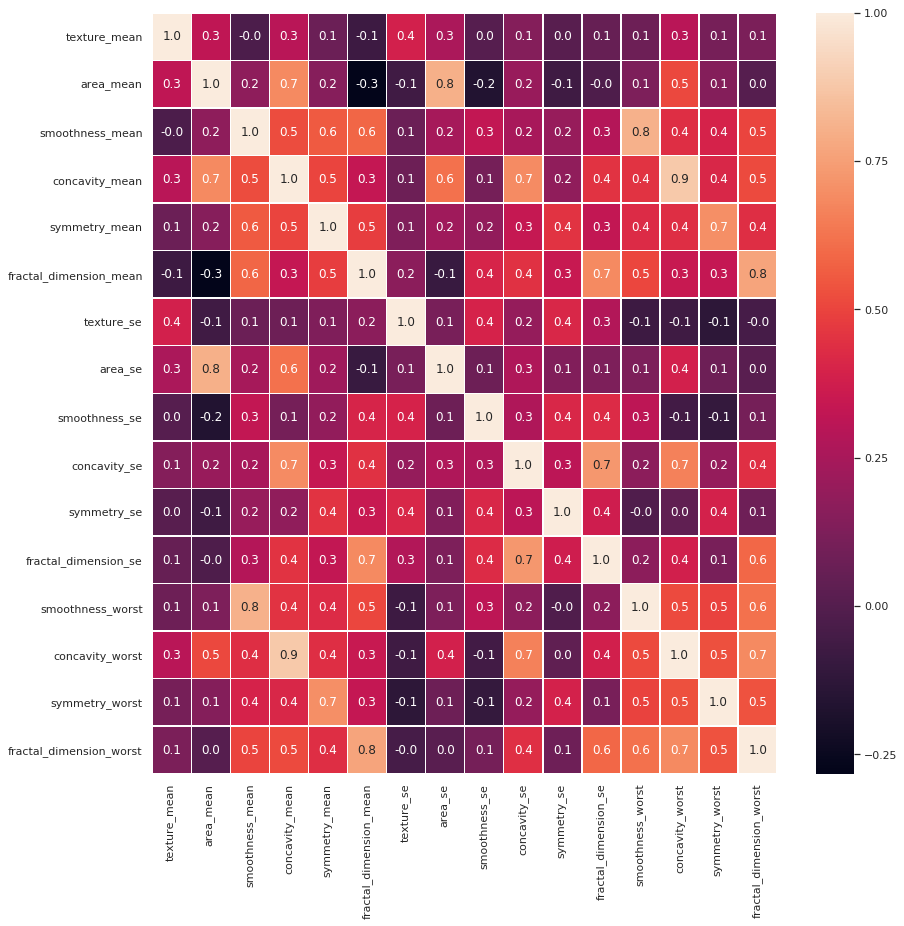

In [21]:
#correlation map
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(x_1.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax,)
plt.show()

Well, we choose our features but **did we choose correctly ?** Lets use random forest and find accuracy according to chosen features.

【訳】さて、特徴量の選択をしたわけだが、**果たして正しい選択をしていたのだろうか？**  
ランダムフォレストを使って選択した特徴量について精度を出してみよう。

Accuracy is:  0.9532163742690059


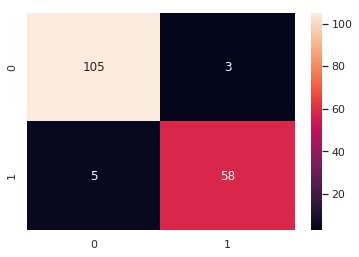

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

# split data train 70 % and test 30 % # 7:3 で train/test に分割
x_train, x_test, y_train, y_test = train_test_split(x_1, y, test_size=0.3, random_state=42)

#random forest classifier with n_estimators=10 (default) # 弱学習器が10個(デフォルト値)のランダムフォレスト分類器
clf_rf = RandomForestClassifier(random_state=43) # random_stateを妙な値に設定している。怪しい。
clr_rf = clf_rf.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac)
# 混同行列を出力する関数
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")
plt.show()

Accuracy is:  0.9473684210526315


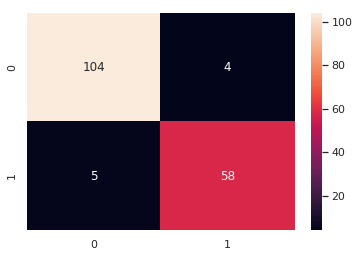

In [23]:
# 追記
# 相関のある特徴量を落とさないとどのような結果が出るのか実験

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

# split data train 70 % and test 30 %
# x_1 ではなく　x　を使用している
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d", )
plt.show()

Accuracy is almost 95% and as it can be seen in confusion matrix, we make few wrong prediction. 
Now lets see other feature selection methods to find better results.

【訳】精度は約 95% であった。
また、混同行列を見ると、少しの間違った推測が発生している。  
さて、他の特徴量選択手法でもっといい結果を模索してみよう。

 【コメント】全特徴量を使った時の結果94.7% -> 95.3%  
 random_stateを変えたら逆転もするレベル。  
 ただし、大事なのは悪化していないということ。

## 2) Univariate feature selection and random forest classification
In univariate feature selection, we will use SelectKBest that removes all but the k highest scoring features.
<http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest>

【訳】単変量特徴量選択では、SelectKBest を利用する。  
これはk個の最高スコアを出す特徴量以外を除去する方法である。

In this method we need to choose how many features we will use. For example, will k (number of features) be 5 or 10 or 15? The answer is only trying or intuitively. I do not try all combinations but I only choose k = 5 and find best 5 features.

【訳】この手法では、いくつの特徴量を選択するかを決めなければいけない。  
例えば5 か 10 か 15 か？  
答えはやってみるか直感的に決めるしかない。  
全ての組み合わせを試しはしないが、とりあえずk = 5を選択してみよう。

In [24]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# find best scored 5 features
# カイ2乗の値でスコアリング, 小さいほうが類似度が高いはず
select_feature = SelectKBest(chi2, k=5).fit(x_train, y_train)

In [25]:
print('Score list:', select_feature.scores_)
print('Feature list:', x_train.columns)

Score list: [1.77946492e+02 6.06916433e+01 1.34061092e+03 3.66899557e+04
 1.00015175e-01 3.41839493e+00 1.30547650e+01 7.09766457e+00
 1.95982847e-01 3.42575072e-04 2.45882967e+01 4.07131026e-02
 1.72696840e+02 6.12741067e+03 1.32470372e-03 3.74071521e-01
 6.92896719e-01 2.01587194e-01 1.39557806e-03 2.65927071e-03
 3.25782599e+02 1.16958562e+02 2.40512835e+03 7.50217341e+04
 2.63226314e-01 1.19077581e+01 2.58858117e+01 8.90751003e+00
 1.00635138e+00 1.23087347e-01]
Feature list: Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'c

In [26]:
# 追記 対応関係がわかりにくいので、特徴量名とスコアを併記
pd.DataFrame(select_feature.scores_, index=x_train.columns)

,0
radius_mean,177.946492
texture_mean,60.691643
perimeter_mean,1340.610924
area_mean,36689.955660
smoothness_mean,0.100015
compactness_mean,3.418395
concavity_mean,13.054765
concave points_mean,7.097665
symmetry_mean,0.195983
fractal_dimension_mean,0.000343


Best 5 feature to classify is that **area_mean, area_se, texture_mean, concavity_worst and concavity_mean**. So lets se what happens if we use only these best scored 5 feature.

【訳】分類のための特徴量のTop 5は以下の5つだった。
* **area_mean**
* **area_se**
* **texture_mean**
* **concavity_worst**
* **concavity_mean**  
ではこの5つの特徴量のみを使うとどうなるか見てみよう。

Accuracy is:  0.9473684210526315


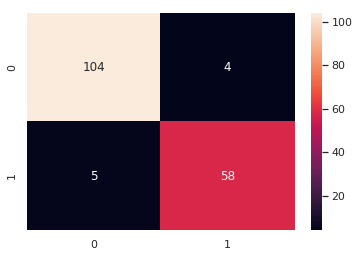

In [27]:
x_train_2 = select_feature.transform(x_train)
x_test_2 = select_feature.transform(x_test)
#random forest classifier with n_estimators=10 (default)
clf_rf_2 = RandomForestClassifier()      
clr_rf_2 = clf_rf_2.fit(x_train_2,y_train)
ac_2 = accuracy_score(y_test,clf_rf_2.predict(x_test_2))
print('Accuracy is: ',ac_2)
cm_2 = confusion_matrix(y_test,clf_rf_2.predict(x_test_2))
sns.heatmap(cm_2,annot=True,fmt="d",)
plt.show()

Accuracy is almost 96% and as it can be seen in confusion matrix, we make few wrong prediction. What we did up to now is that we choose features according to correlation matrix and according to selectkBest method. Although we use 5 features in selectkBest method accuracies look similar.
Now lets see other feature selection methods to find better results.

【訳】精度は約 96%、混同行列からいくつか間違いをしていることが分かる。  
現状を整理する、まず相関行列から特徴量を選択して、次にselectkBest手法から特徴量を選択した。  
にも関わらず、selectkBestで5この特徴量を選択しても同じような精度となった。  
さて、他の特徴量選択手法も見てみよう。

## 3) Recursive feature elimination (RFE) with random forest
<http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html>
Basically, it uses one of the classification methods (random forest in our example), assign weights to each of features. Whose absolute weights are the smallest are pruned from the current set features. That procedure is recursively repeated on the pruned set until the desired number of features

 【訳】基本的に、これはある分類手法(今回はランダムフォレスト)を使用し、それぞれの特徴量に重みを付与する。  
その重みの絶対値がもっとも小さいものを現在の特徴量セットから刈り込む。  
この手続きを再帰的に、欲しい特徴量数になるまで繰り返す。

Like previous method, we will use 5 features. However, which 5 features will we use ? We will choose them with RFE method.

【訳】単変量特徴量選択と同様に、5個の特徴量を使うこととしよう。  
ではどの5個の特徴量を使うのか？  
RFE手法で選ぼう。  

In [28]:
from sklearn.feature_selection import RFE
# Create the RFE object and rank each pixel
clf_rf_3 = RandomForestClassifier()
# step=1 は毎回1つずつ特徴量を削るということ
rfe = RFE(estimator=clf_rf_3, n_features_to_select=5, step=1)
rfe = rfe.fit(x_train, y_train)

In [29]:
print('Chosen best 5 feature by rfe:',x_train.columns[rfe.support_])

Chosen best 5 feature by rfe: Index(['concave points_mean', 'radius_worst', 'perimeter_worst', 'area_worst',
       'concave points_worst'],
      dtype='object')


Chosen 5 best features by rfe is **texture_mean, area_mean, concavity_mean, area_se, concavity_worst**. They are exactly similar with previous (selectkBest) method. Therefore we do not need to calculate accuracy again. Shortly, we can say that we make good feature selection with rfe and selectkBest methods. However as you can see there is a problem, okey I except we find best 5 feature with two different method and these features are same but why it is **5**. Maybe if we use best 2 or best 15 feature we will have better accuracy. Therefore lets see how many feature we need to use with rfecv method.

【訳】選んだ特徴量
* **area_mean**
* **area_se**
* **texture_mean**
* **concavity_worst**
* **concavity_mean**  
selectkBestと全く同じ結果だった。  
再び精度計算する必要はないだろう。  
端的に言うと、selectkBestとRFE、どちらでも良い特徴量選択ができる。  
ここで問題となるのは、さあどちらの手法でも5個の最適な特徴量が得られたが、なぜ**5**であるのか？  
2とか15個の特徴量を選べばもっと良い精度がでるのではないか？  
それでは何この特徴量が必要なのか、RFECV手法を使ってみよう。

【コメント】Cross Validataion(交差検証)とは、訓練データを任意数nのグループに分割し、それぞれのグループを検証データとして性能測定した結果の平均値を最終的な性能とする評価方法のこと。  
全訓練データを使用して性能評価をするため、信頼の高い評価が期待できる。

## 4) Recursive feature elimination with cross validation and random forest classification
<http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html>
Now we will not only **find best features** but we also find **how many features do we need** for best accuracy.

【訳】それでは、最高精度を達成するためには**最適な特徴量を探す**だけでなく、**何個の特徴量が必要か**を探してみよう。

In [30]:
from sklearn.feature_selection import RFECV

# The "accuracy" scoring is proportional to the number of correct classifications
clf_rf_4 = RandomForestClassifier() 
# cv=5 は5個に分けてCVするということ
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(x_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', x_train.columns[rfecv.support_])

Optimal number of features : 12
Best features : Index(['texture_mean', 'perimeter_mean', 'compactness_mean',
       'concave points_mean', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst'],
      dtype='object')


Finally, we find best 11 features that are **texture_mean, area_mean, concavity_mean, texture_se, area_se, concavity_se, symmetry_se, smoothness_worst, concavity_worst, symmetry_worst and fractal_dimension_worst** for best classification. Lets look at best accuracy with plot.


【訳】最終的に以下の11個の特徴量が最適であるという結果になった。  
* **texture_mean**
* **area_mean**
* **concavity_mean**
* **texture_se**
* **area_se**
* **concavity_se**
* **symmetry_se**
* **smoothness_worst**
* **concavity_worst**
* **symmetry_worst**
* **fractal_dimension_worst**

では最適精度をプロットと共に見てみよう。

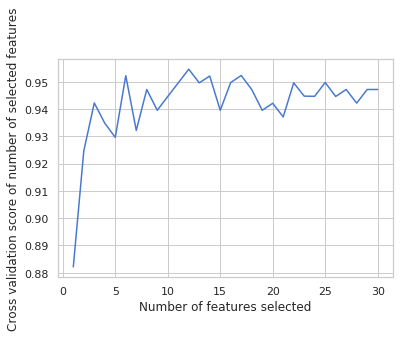

In [31]:
# Plot number of features VS. cross-validation scores
import matplotlib.pyplot as plt
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

【コメント】今回の最適特徴量数は11だったが、プロットのガタつき具合から信頼度は低そう。  
8を超えたくらいから緩やかに減少傾向があるように見受けられるので、10付近の値を使うのは理にかなっている。  
余裕があれば複数回別シードでスキャンしてみても良いかもしれない。

Lets look at what we did up to this point. Lets accept that guys this data is very easy to classification. However, our first purpose is actually not finding good accuracy. Our purpose is learning how to make **feature selection and understanding data.** Then last make our last feature selection method.

【訳】現状を整理する。  
このデータがとても分類が簡単であることは受け入れよう。  
しかし、当初の目的は良い精度を追い求めることではない。  
目的はどのように**特徴量選択とデータの理解**をするのかを学ぶことである。  
では最後に、最後の特徴量選択手法を行う。

## 5) Tree based feature selection and random forest classification
<http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html>
In random forest classification method there is a **feature_importances_** attributes that is the feature importances (the higher, the more important the feature). **!!! To use feature_importance method, in training data there should not be correlated features. Random forest choose randomly at each iteration, therefore sequence of feature importance list can change.**


【訳】ランダムフォレストには**featureimportances**という属性があり、特徴量の重要性を意味する。(高いほどその特徴量が重要である。)  
**注意** この手法を使う時は、訓練データの中に相関のある特徴量を入れてはいけない。  
ランダムフォレストは各イテレーションでランダムに選択を行うため、特徴量の重要性リストは変わることがある。

Feature ranking:
1. feature 20 (0.228856)
2. feature 6 (0.203920)
3. feature 22 (0.114846)
4. feature 27 (0.101470)
5. feature 0 (0.067628)
6. feature 2 (0.065092)
7. feature 7 (0.031244)
8. feature 1 (0.027013)
9. feature 25 (0.017135)
10. feature 21 (0.016947)
11. feature 28 (0.013374)
12. feature 23 (0.013123)
13. feature 15 (0.010677)
14. feature 26 (0.010053)
15. feature 17 (0.009747)
16. feature 16 (0.008883)
17. feature 10 (0.008485)
18. feature 29 (0.007393)
19. feature 24 (0.007036)
20. feature 12 (0.006219)
21. feature 18 (0.005786)
22. feature 19 (0.005489)
23. feature 4 (0.004163)
24. feature 3 (0.003915)
25. feature 9 (0.003384)
26. feature 11 (0.002585)
27. feature 13 (0.001811)
28. feature 5 (0.001728)
29. feature 14 (0.001447)
30. feature 8 (0.000553)


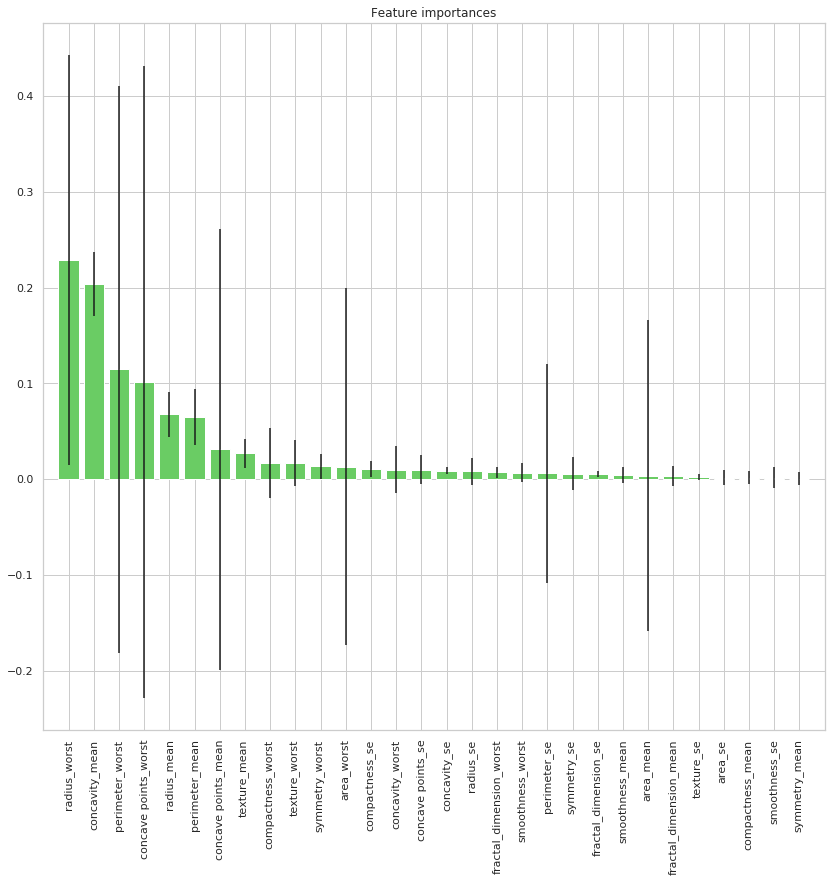

In [32]:
clf_rf_5 = RandomForestClassifier()      
clr_rf_5 = clf_rf_5.fit(x_train,y_train)
# RandomForestClassifier 全体の特徴量重要度
importances = clr_rf_5.feature_importances_
# RandomForestClassifier.estimators_ に DicisionTreeClassifier のリストが入っている
# その中のfeature_importances_ 属性のstdを取る
std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(x_train.shape[1]), x_train.columns[indices],rotation=90)
plt.xlim([-1, x_train.shape[1]])
plt.show()

As you can seen in plot above, after 5 best features importance of features decrease. Therefore we can focus these 5 features. As I sad before, I give importance to understand features and find best of them. 

 【訳】上のプロットから分かるように、5個の最適特徴量以降は特徴量の重要度は減少していく。  
したがってこれらの5個の特徴量に目を向けることができる。  
前にも言ったが、ここでは特徴量の理解と最適な特徴量の探索方法についての重要性を提示しているのだ。  
【コメント】マイナスの値はないはず。エラーバーはstdなので、大きい外れ値があるようだ。

# Feature Extraction
<http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html>
We will use principle component analysis (PCA) for feature extraction. Before PCA, we need to normalize data for better performance of PCA.
 

【訳】特徴量抽出のため、主成分分析(PCA)を使う。  
PCAが良い結果を出すために、PCAの前にデータの正規化をする必要がある。

【コメント】PCAは多変量解析において特徴量の次元を圧縮する手法。  

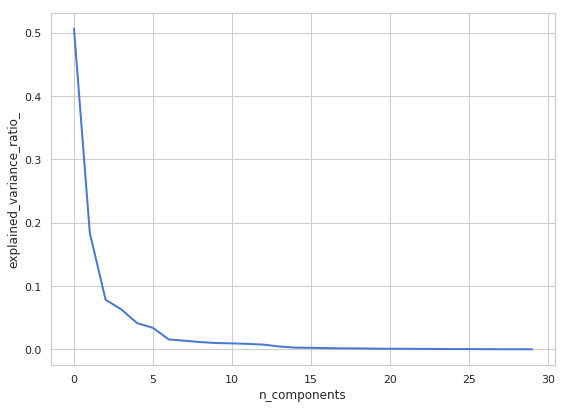

In [33]:
# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
#normalization
x_train_N = (x_train-x_train.mean())/(x_train.max()-x_train.min())
x_test_N = (x_test-x_test.mean())/(x_test.max()-x_test.min())

from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x_train_N)

# plt.figure(1, figsize=(14, 13))
plt.figure(1, figsize=(10, 7))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(pca.explained_variance_ratio_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio_')

plt.show()

According to variance ration, 3 component can be chosen.

【訳】分散比によって、3成分が選ばれる。  
【コメント】説明が少し雑なので補足。  
主成分分析においては、圧縮された特徴量で全特徴量の分散の何%を表現できるかを指標とする。  
一般的に95%程度の分散が表現できれば良いとされているため、3成分が必要十分と判断された(のだろう)。

# Conclusion
Shortly, I tried to show importance of feature selection and data visualization. 
Default data includes 33 feature but after feature selection we drop this number from 33 to 5 with accuracy 95%. In this kernel we just tried basic things, I am sure with these data visualization and feature selection methods, you can easily ecxeed the % 95 accuracy. Maybe you can use other classification methods.
### I hope you enjoy in this kernel
## If you have any question or advise, I will be apreciate to listen them ...

【訳】端的に言うと、ここでは特徴量選択とデータ可視化の重要性をお見せしようとしてきた。  
元のデータは33の特徴量を含むが、特徴量選択後には33から5まで特徴量数を落として精度95%であった。  
このカーネルではただ基本的なものを試したわけだが、このデータ可視化と特徴量選択方法を使えば、95%以上の精度を簡単に出せるだろう。  
そして他の分類手法にも使えるだろう。